In [43]:
import best_subset_funcs as fncs
import  numpy as np
import pandas as pd
import json as js
import os
import matplotlib.pyplot as plt
from matplotlib import rc

In [44]:
arr1 = 10*np.random.random([100,2])
print("arr1")
print(arr1)

arr1
[[6.01997129 2.04636703]
 [4.65796145 8.09299345]
 [2.00889729 4.24119759]
 [7.84001983 2.67330981]
 [1.44245046 3.57632557]
 [2.89463687 0.74120366]
 [6.92438282 9.70147021]
 [3.13217874 1.54030598]
 [4.70829419 9.45014324]
 [3.73959158 0.81724073]
 [8.95093527 6.70317129]
 [3.01829269 6.38391266]
 [6.84901493 3.46603229]
 [8.74784319 1.24515786]
 [5.9443528  5.31148906]
 [4.30336781 8.84993671]
 [7.62412488 2.41134851]
 [4.36657905 0.61822091]
 [5.22776527 2.64036256]
 [5.30882416 4.96506515]
 [3.40033725 5.82958809]
 [9.84950833 0.23854601]
 [4.3146738  6.67501317]
 [1.50805635 4.39002102]
 [8.64767573 7.94581192]
 [9.86675085 6.72519488]
 [0.35200003 2.0672069 ]
 [9.11237033 4.51819708]
 [8.67292004 9.07959248]
 [3.03144798 5.11321305]
 [5.48412632 5.3844249 ]
 [6.06040792 4.26742214]
 [4.23047592 0.46428617]
 [6.54548997 7.60245439]
 [6.62096075 6.95185474]
 [3.46414294 1.64780038]
 [2.19288499 3.13200412]
 [8.52066239 6.84294223]
 [8.32687352 5.50913828]
 [8.36339727 4.51531

In [45]:
for thresh in [0.001, 0.01, 0.05, 0.1, 0.9, 2, 10]:
    indexes = fncs.coalesce(arr1, thresh)
    print("with a threshold of {} the subset has a size of {}".format(thresh, len(indexes)))

with a threshold of 0.001 the subset has a size of 100
with a threshold of 0.01 the subset has a size of 100
with a threshold of 0.05 the subset has a size of 100
with a threshold of 0.1 the subset has a size of 100
with a threshold of 0.9 the subset has a size of 46
with a threshold of 2 the subset has a size of 14
with a threshold of 10 the subset has a size of 1


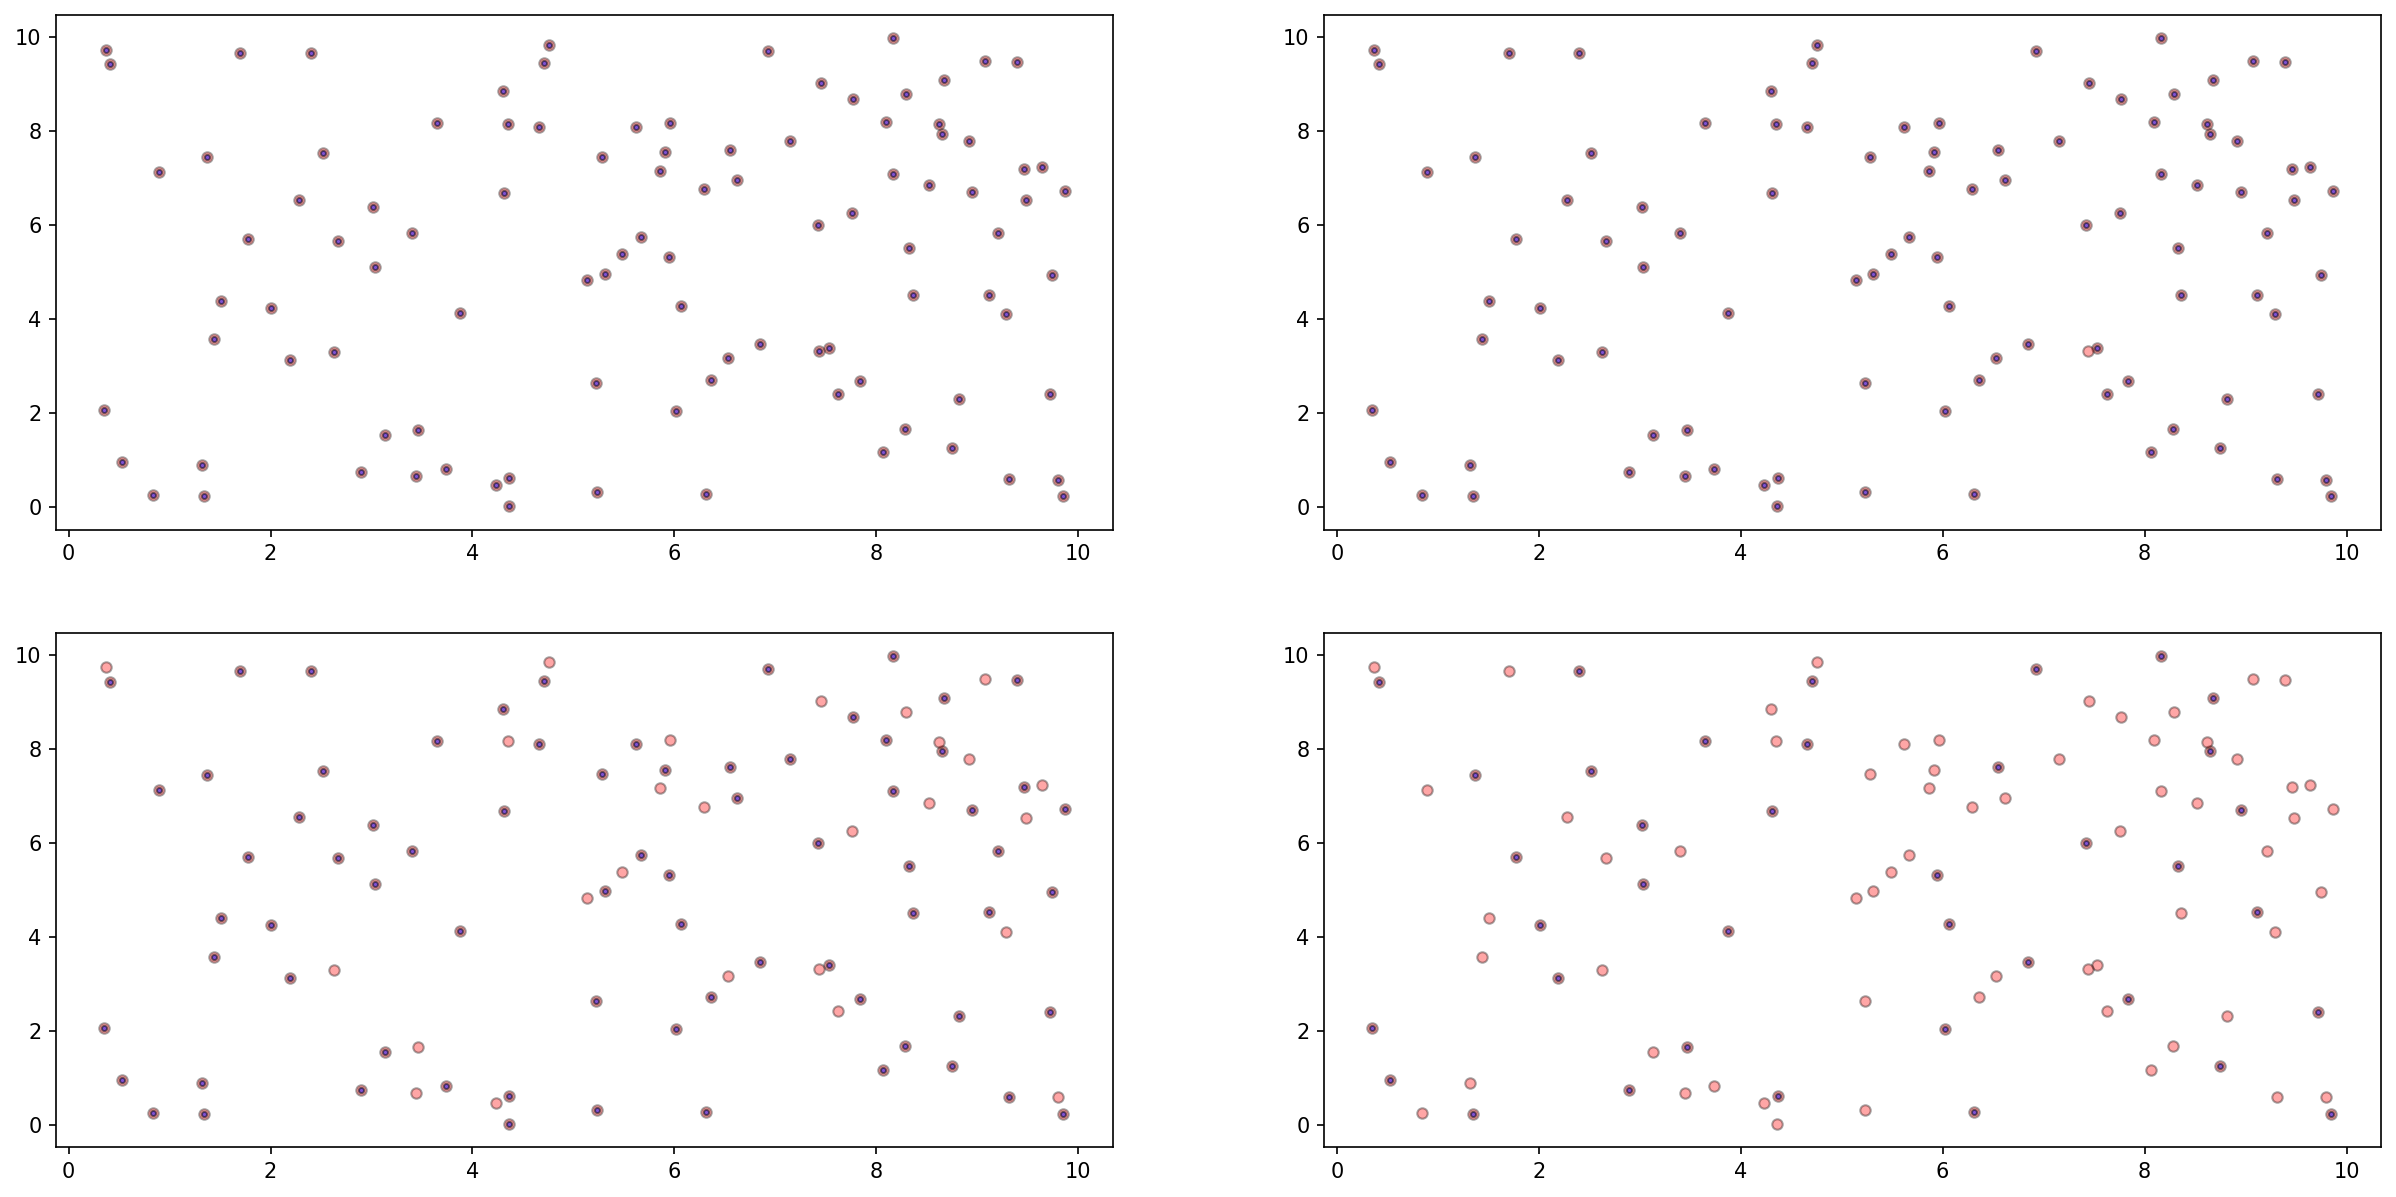

In [46]:
fig = plt.figure(figsize=(20, 10), dpi=150)
for n,t in enumerate([0.075, 0.15, 0.5, 1.0]):
    ax = fig.add_subplot(221+n)
    sbst = fncs.coalesce(arr1, t)
    ax.plot(*arr1.T, markerfacecolor="r", markersize=5, markeredgewidth=1, markeredgecolor="k",
            linestyle="", marker="o", alpha=0.35)
    ax.plot(*arr1[sbst].T,  markerfacecolor="b", markersize=2.5, markeredgewidth=1, markeredgecolor="k",
            linestyle="", marker="o", alpha=0.5)

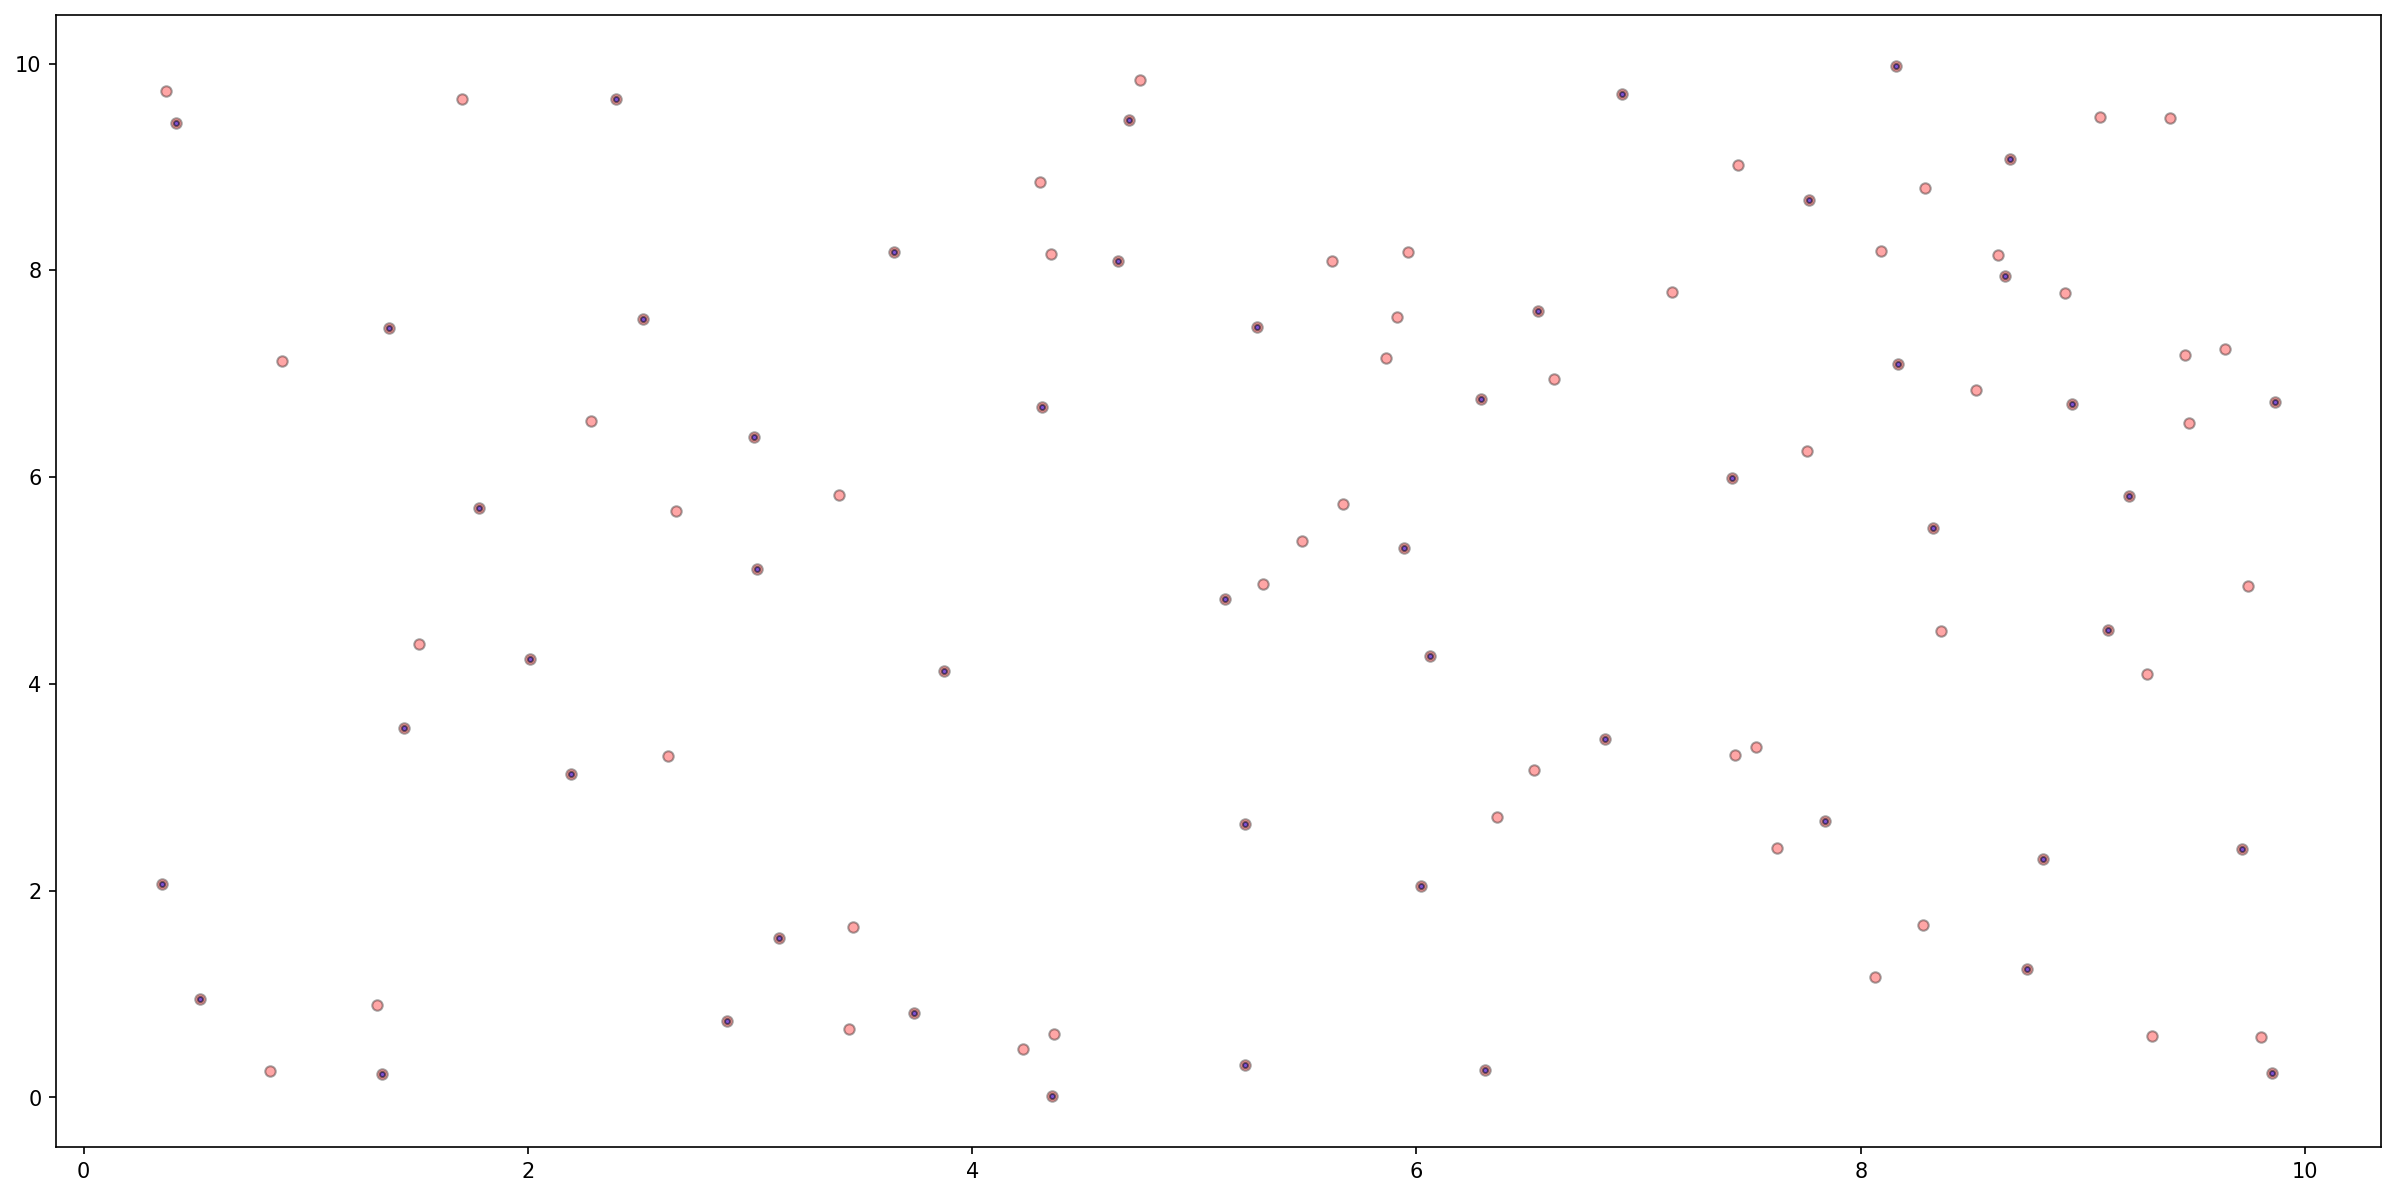

In [47]:
des_size = 50
t0 = 0.05
t_inc = 0.001
sbst = fncs.reduce_to(arr1, des_size, t0, t_inc)
fig = plt.figure(figsize=(20, 10), dpi=150)
ax = fig.add_subplot(111)
ax.plot(*arr1.T, markerfacecolor="r", markersize=5, markeredgewidth=1, markeredgecolor="k",
            linestyle="", marker="o", alpha=0.35)
ax.plot(*sbst.T,  markerfacecolor="b", markersize=2.5, markeredgewidth=1, markeredgecolor="k",
            linestyle="", marker="o", alpha=0.5)

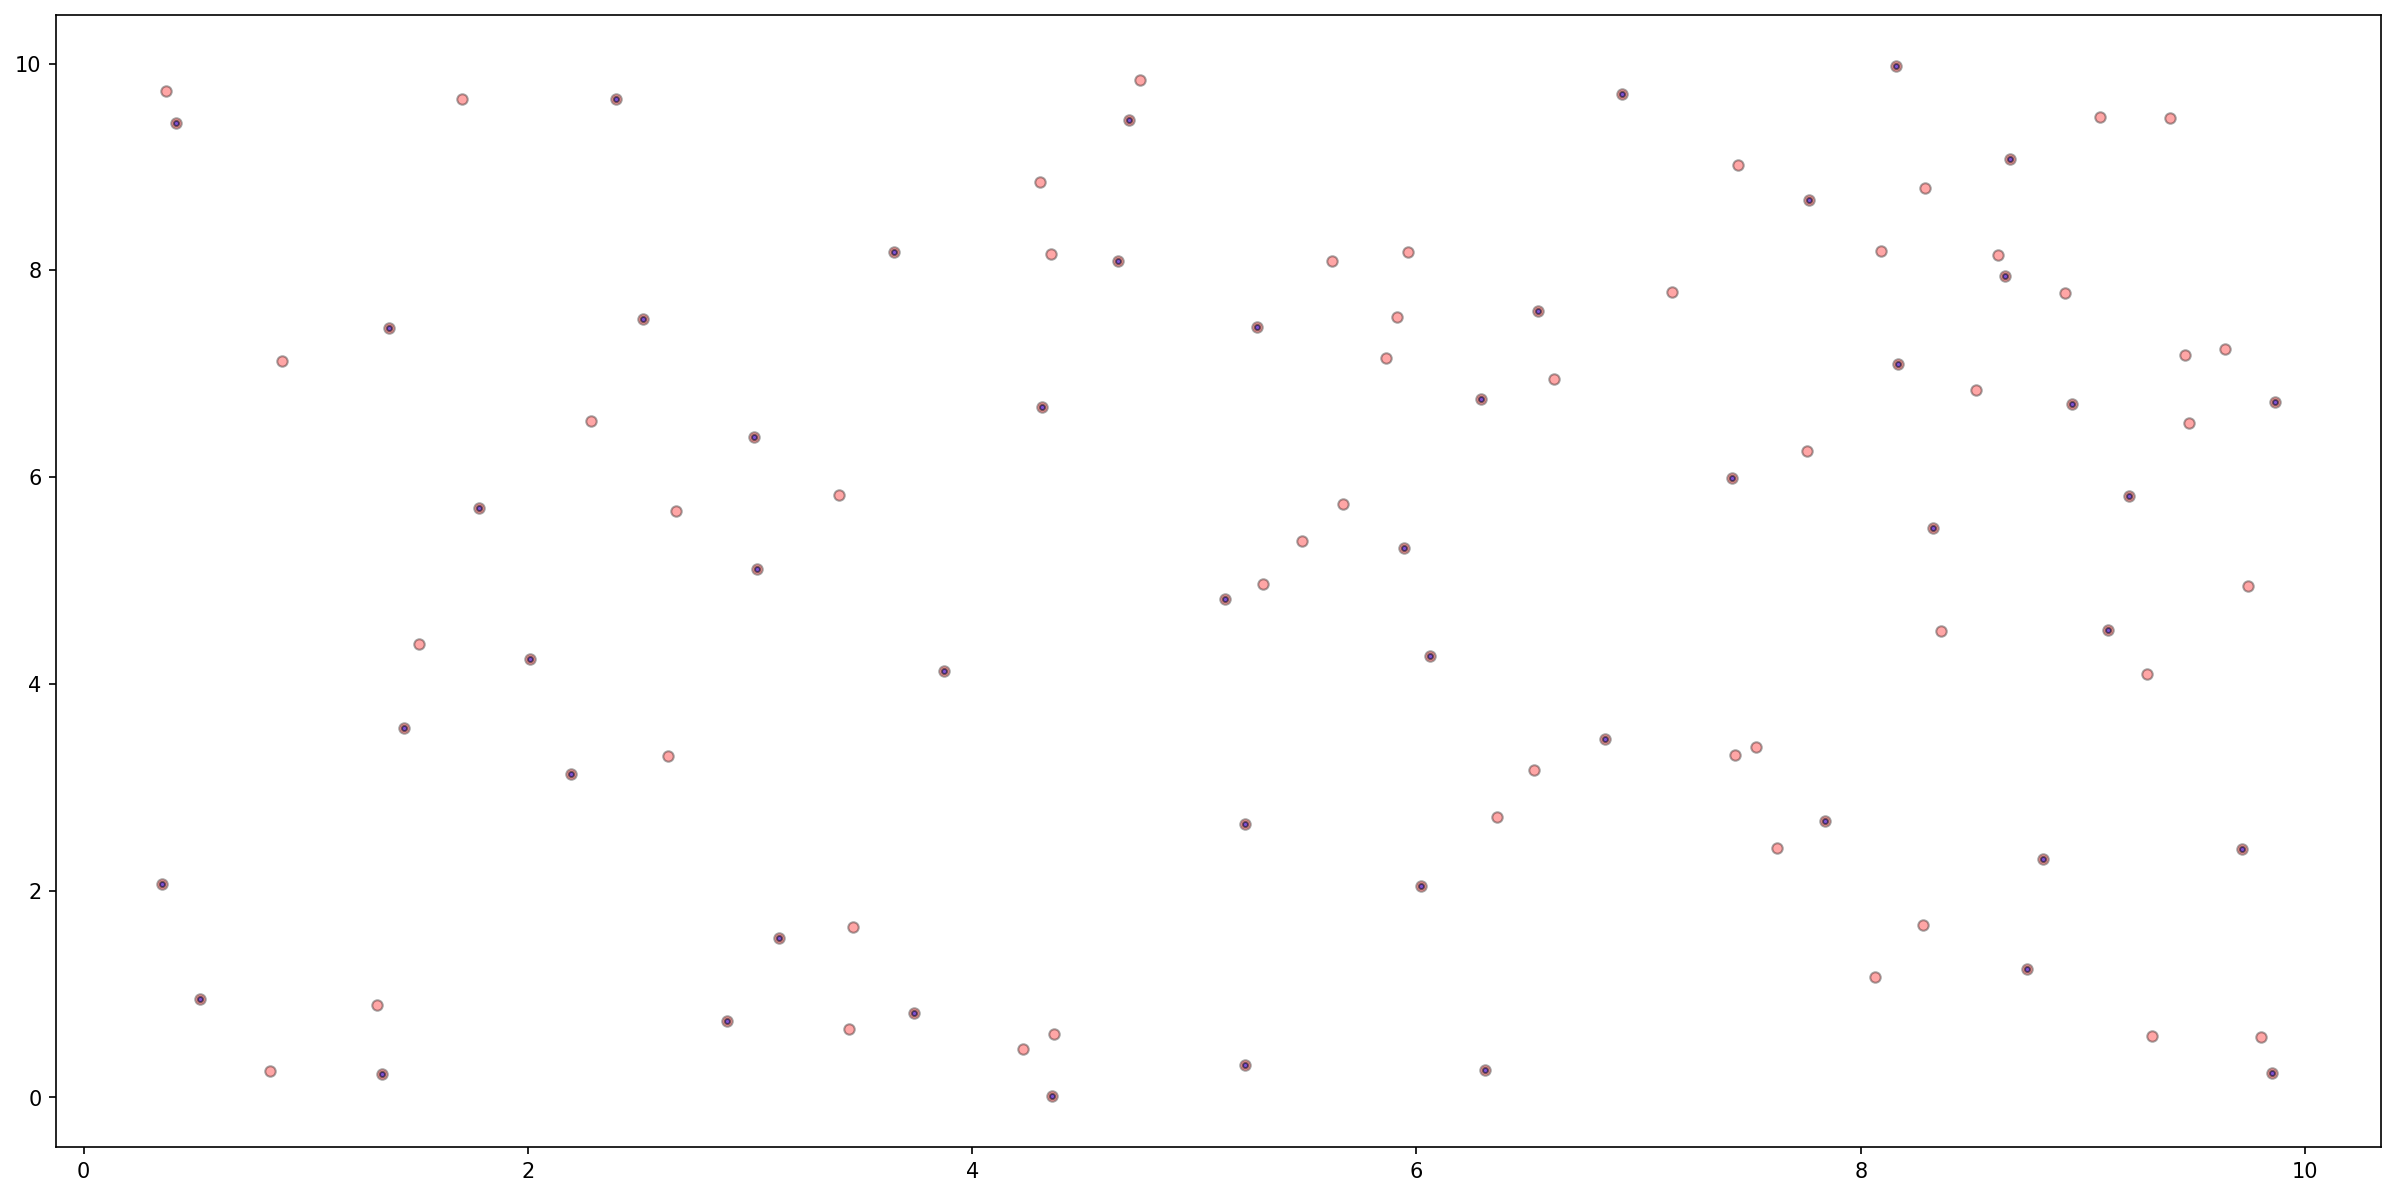

In [48]:
t1 = 0.05
thresh = 0.001
sbst = fncs.reduce_bisect(arr1, des_size, t1, thresh)
fig = plt.figure(figsize=(20, 10), dpi=150)
ax = fig.add_subplot(111)
ax.plot(*arr1.T, markerfacecolor="r", markersize=5, markeredgewidth=1, markeredgecolor="k",
            linestyle="", marker="o", alpha=0.35)
ax.plot(*arr1[sbst].T,  markerfacecolor="b", markersize=2.5, markeredgewidth=1, markeredgecolor="k",
            linestyle="", marker="o", alpha=0.5)


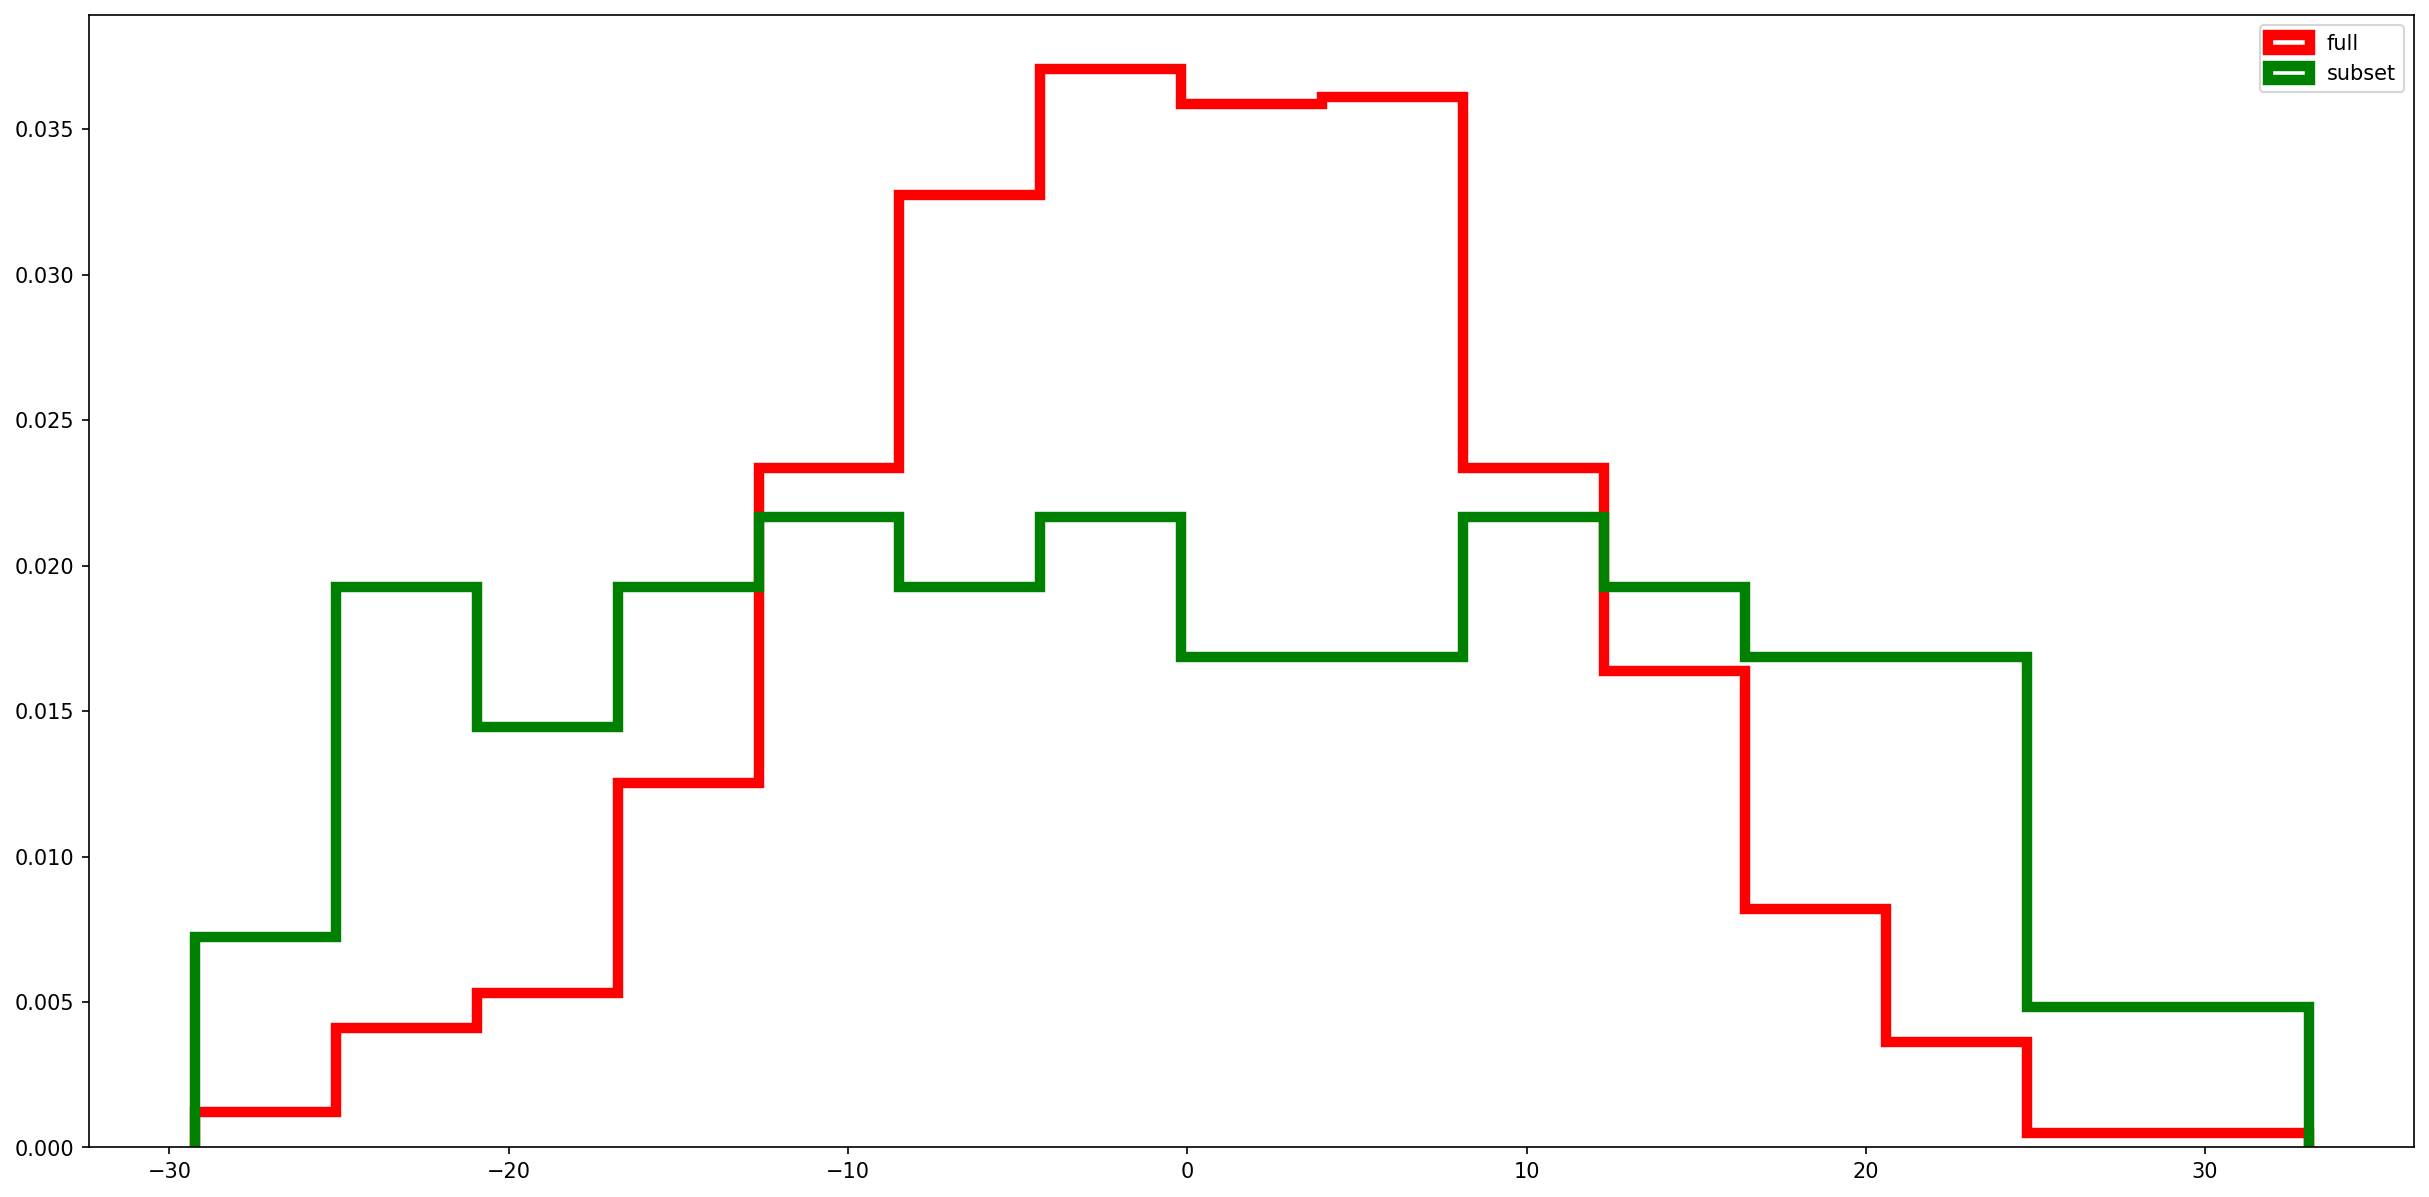

In [49]:
gauss = 10*np.random.randn(1000,1)
sbst = fncs.reduce_bisect(gauss, 100, 0.0001, 0.0001)
fig = plt.figure(figsize=(20, 10), dpi=150)
ax = fig.add_subplot(111)
ax.hist(gauss, bins=15, alpha=1, density=True,color="red", histtype="step", linewidth=5, label="full")
ax.hist(gauss[sbst], bins=15, alpha=1, density=True,color="green", histtype="step", linewidth=5, label="subset")
ax.legend()

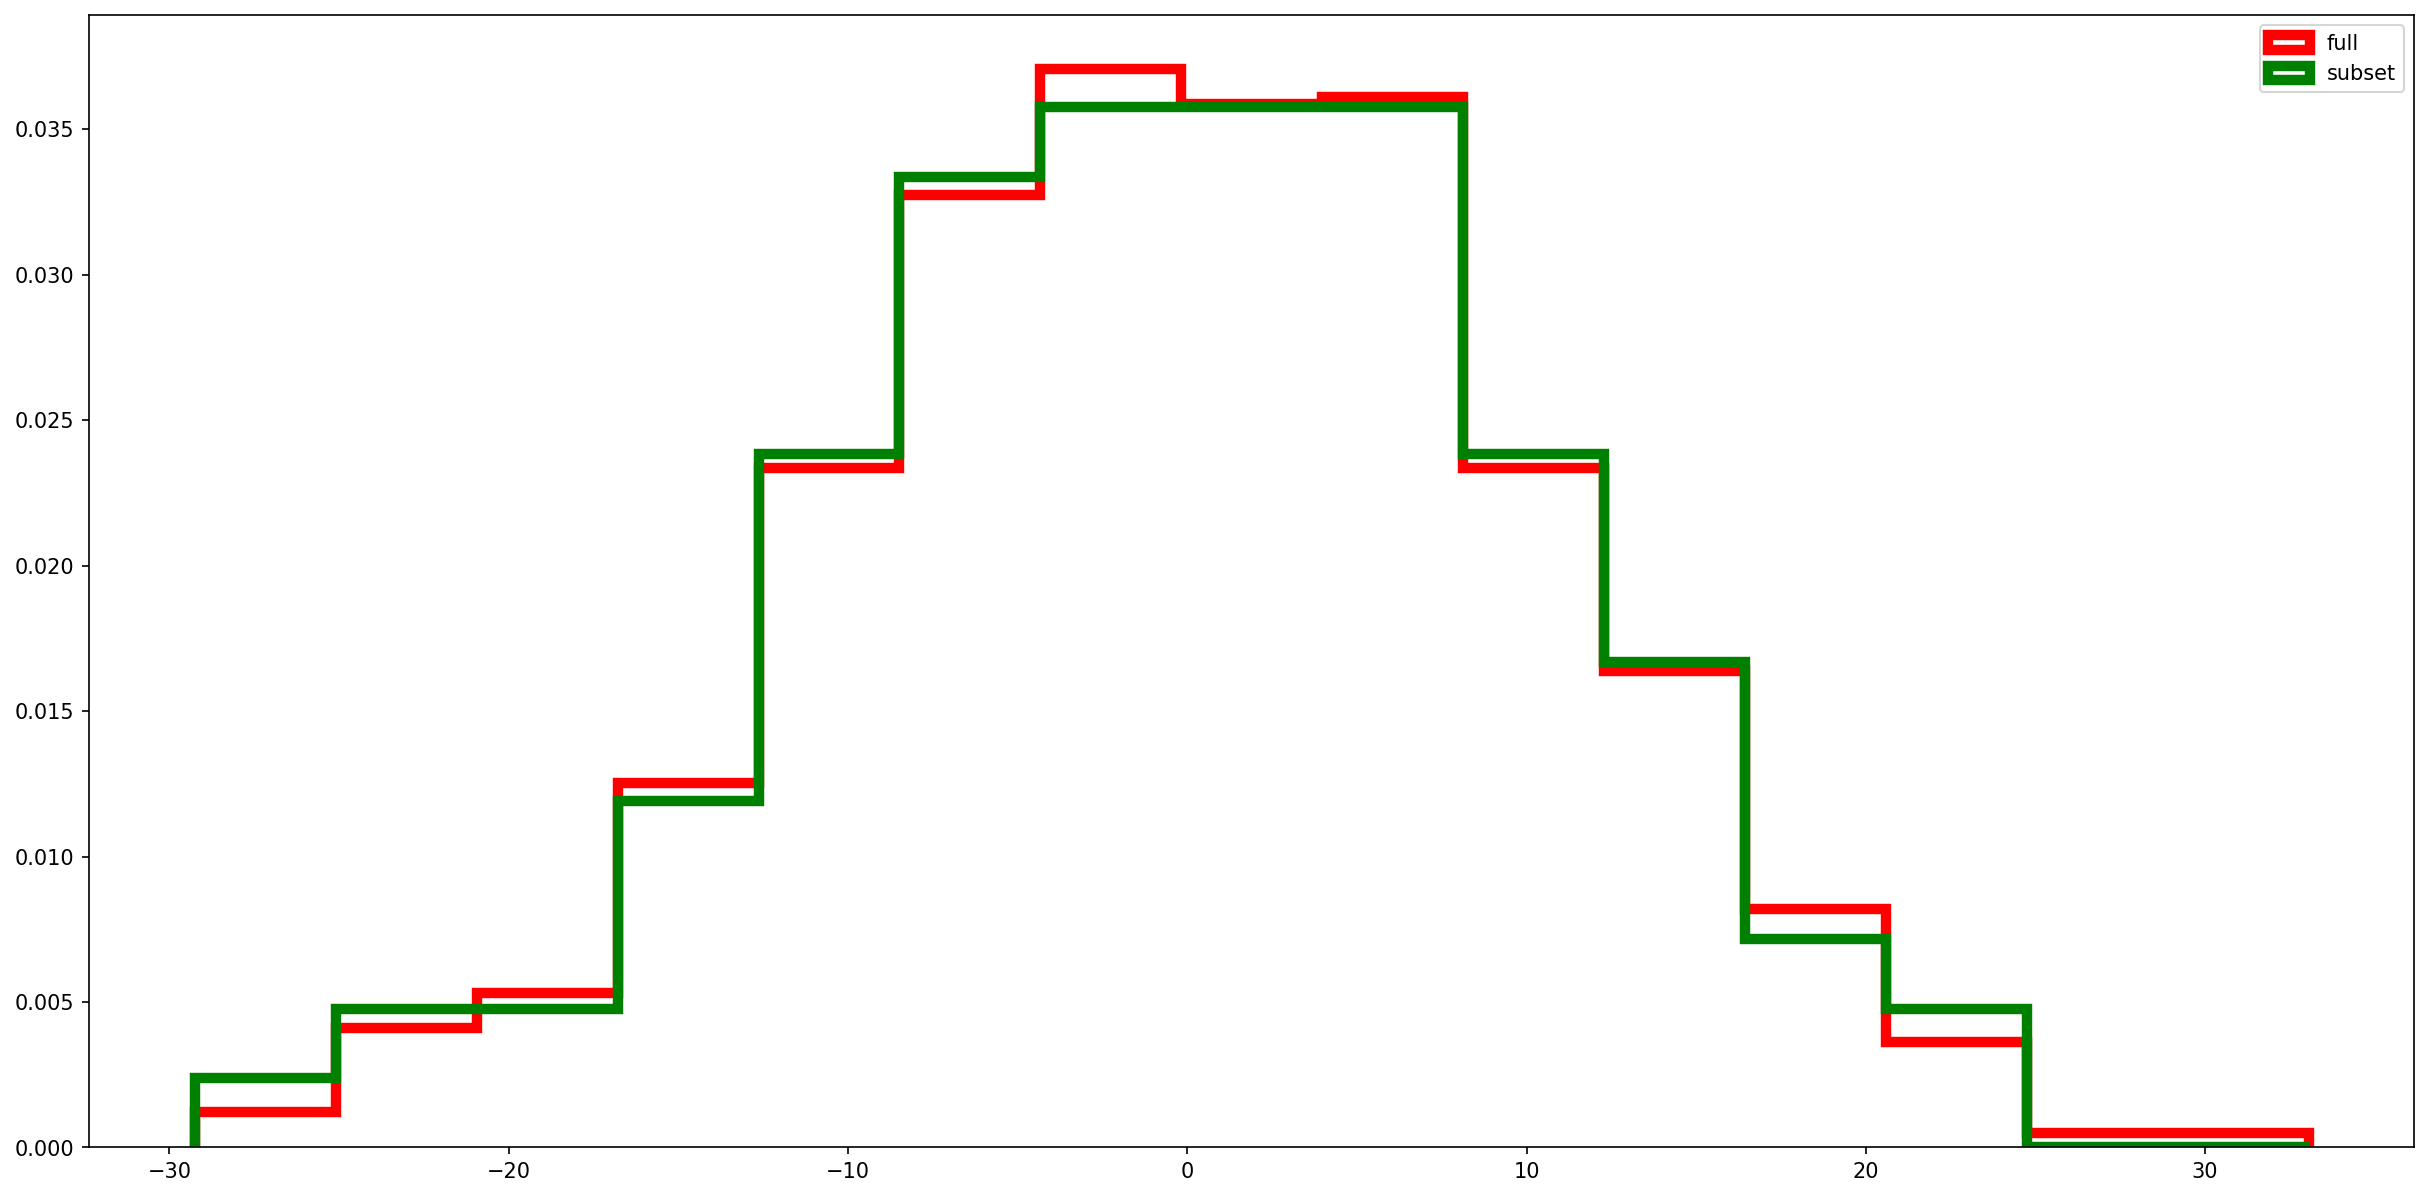

In [50]:
sbst = fncs.subset(gauss, 15, 10, 0.0001, 0.0001)
fig = plt.figure(figsize=(20, 10), dpi=150)
ax = fig.add_subplot(111)
_, bins, _t = ax.hist(gauss, bins=15, alpha=1, density=True,color="red", histtype="step", linewidth=5, label="full")
ax.hist(gauss[sbst], bins=bins, alpha=1, density=True,color="green", histtype="step", linewidth=5, label="subset")
ax.legend()

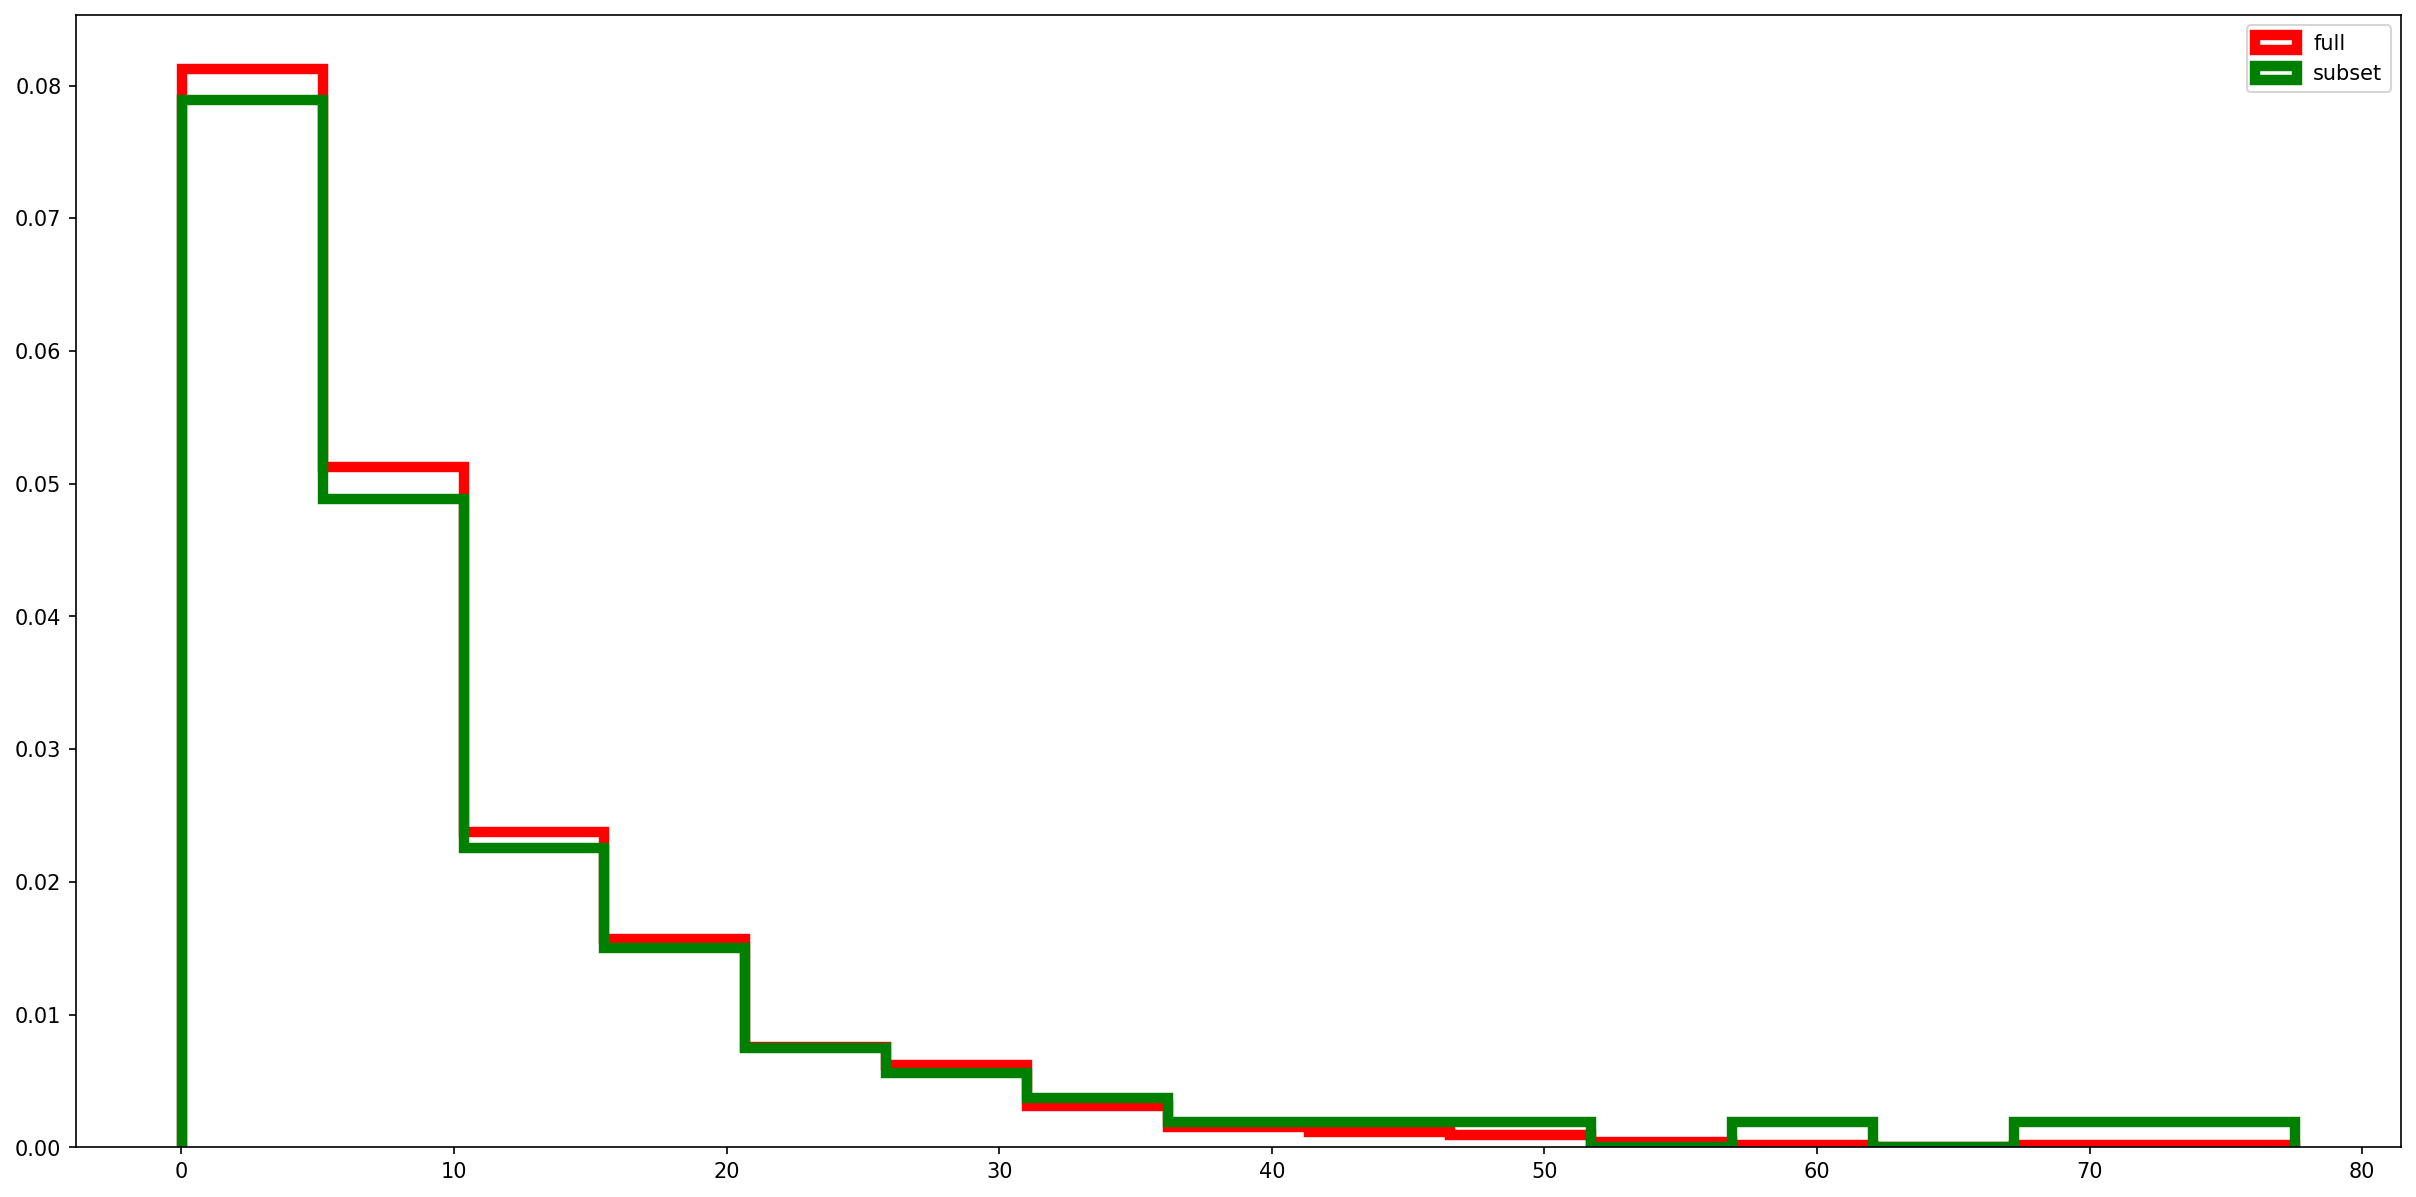

In [51]:
exp = 10*np.random.exponential(scale=1.0, size=[1000,1])
sbst = fncs.subset(exp, 15, 10, 0.0001, 0.0001)
fig = plt.figure(figsize=(20, 10), dpi=150)
ax = fig.add_subplot(111)
_, bins, _t = ax.hist(exp, bins=15, alpha=1, density=True,color="red", histtype="step", linewidth=5, label="full")
ax.hist(exp[sbst], bins=bins, alpha=1, density=True,color="green", histtype="step", linewidth=5, label="subset")
ax.legend()

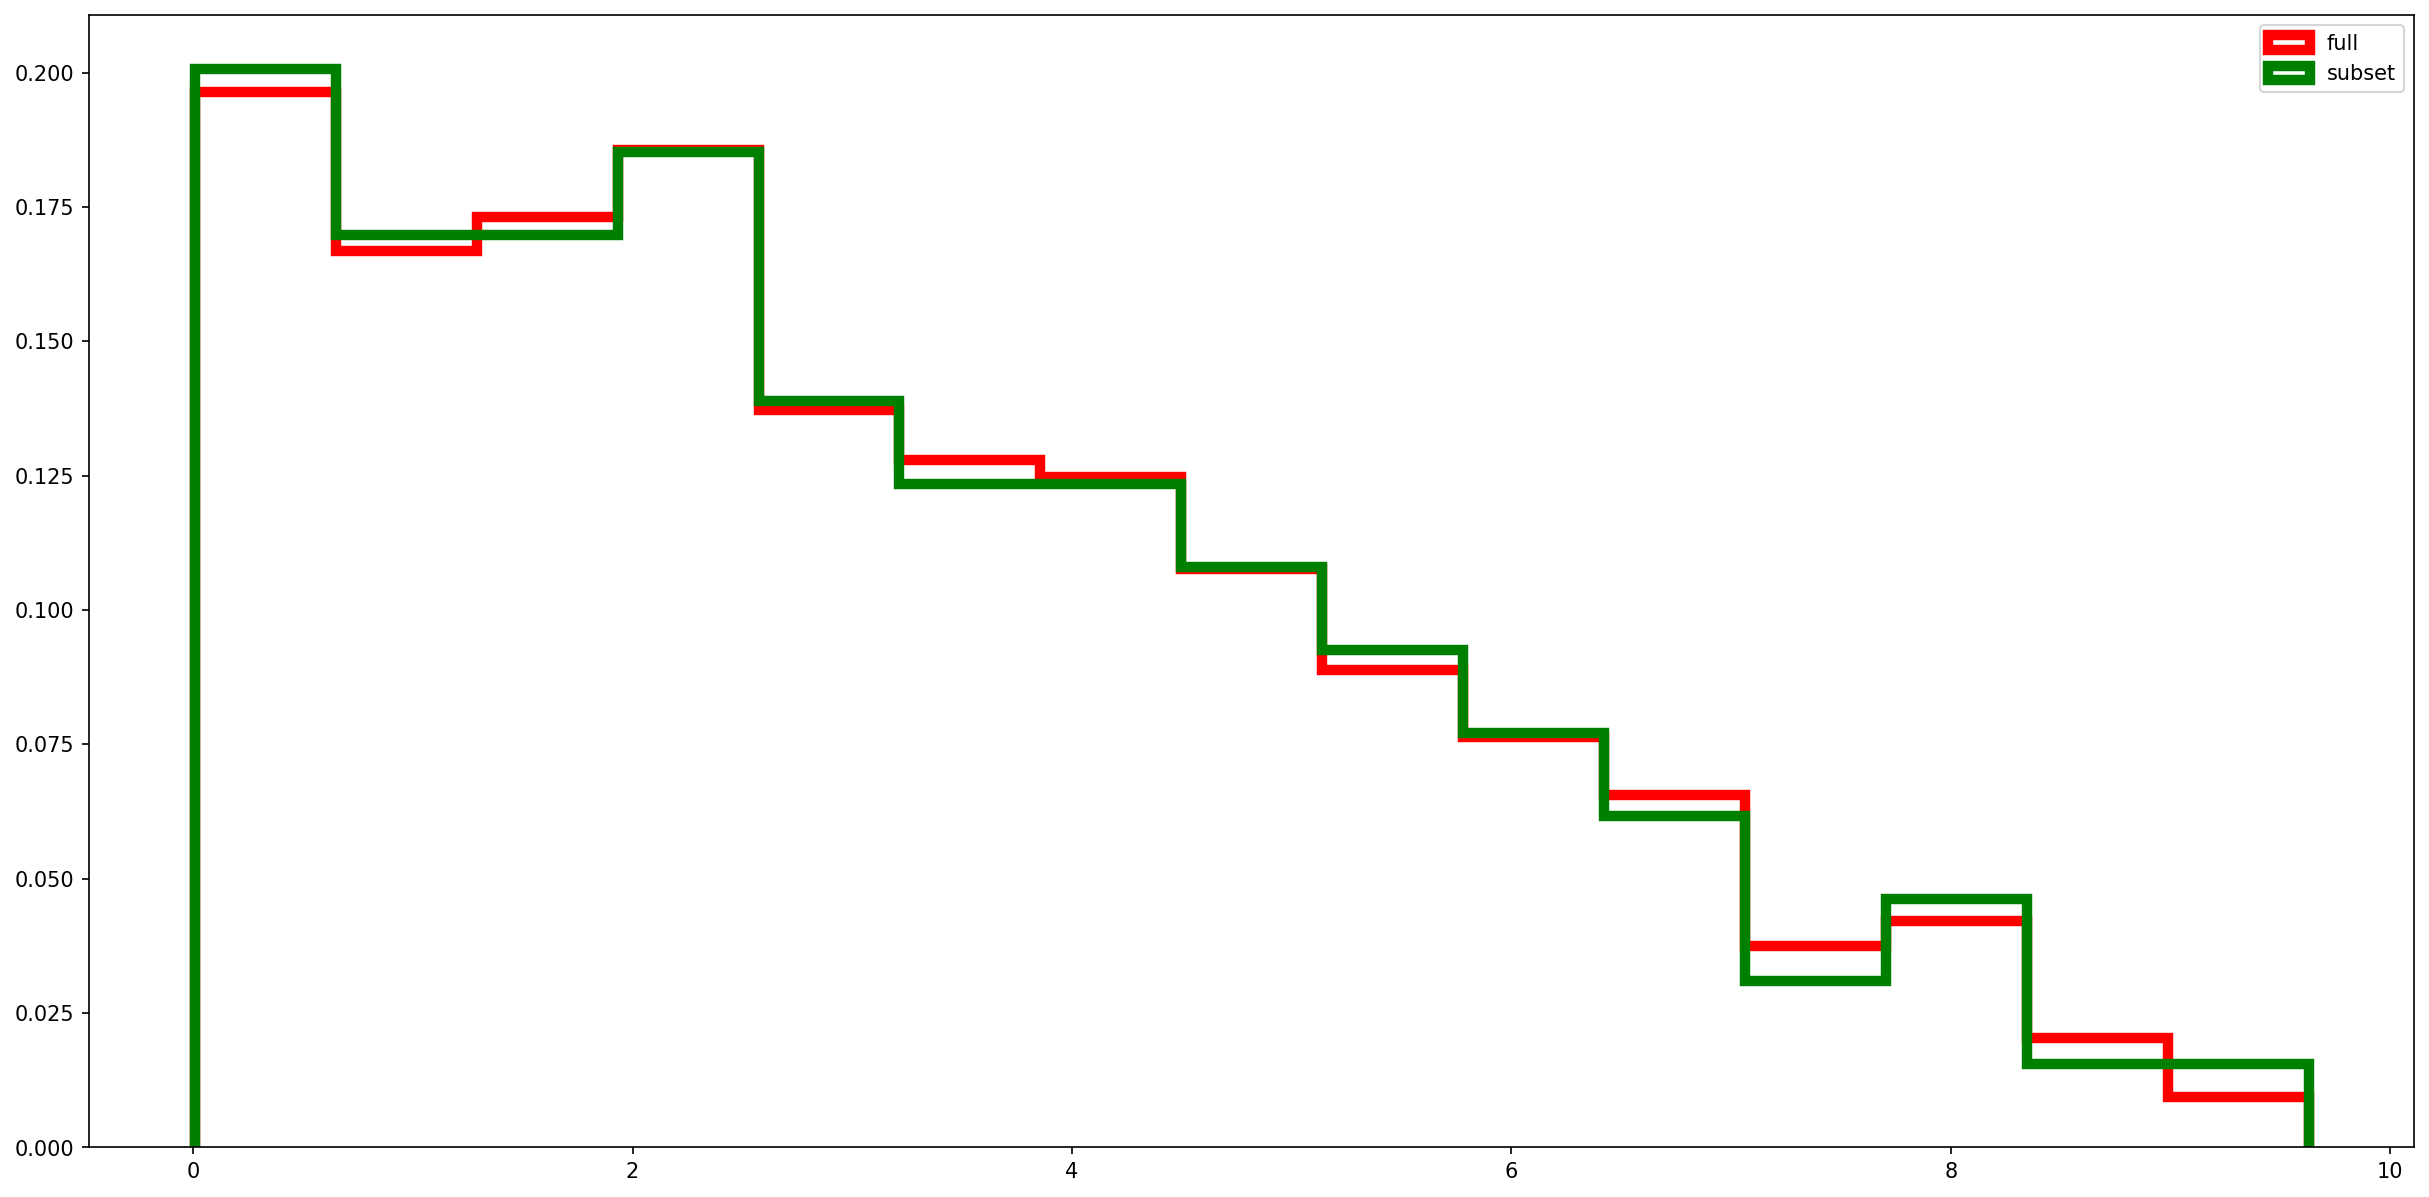

In [52]:
beta = 10*np.random.beta(a=1.0, b=2.0, size=[1000,1])
sbst = fncs.subset(beta, 15, 10, 0.0001, 0.0001)
fig = plt.figure(figsize=(20, 10), dpi=150)
ax = fig.add_subplot(111)
_, bins, _t = ax.hist(beta, bins=15, alpha=1, density=True,color="red", histtype="step", linewidth=5, label="full")
ax.hist(beta[sbst], bins=bins, alpha=1, density=True,color="green", histtype="step", linewidth=5, label="subset")
ax.legend()

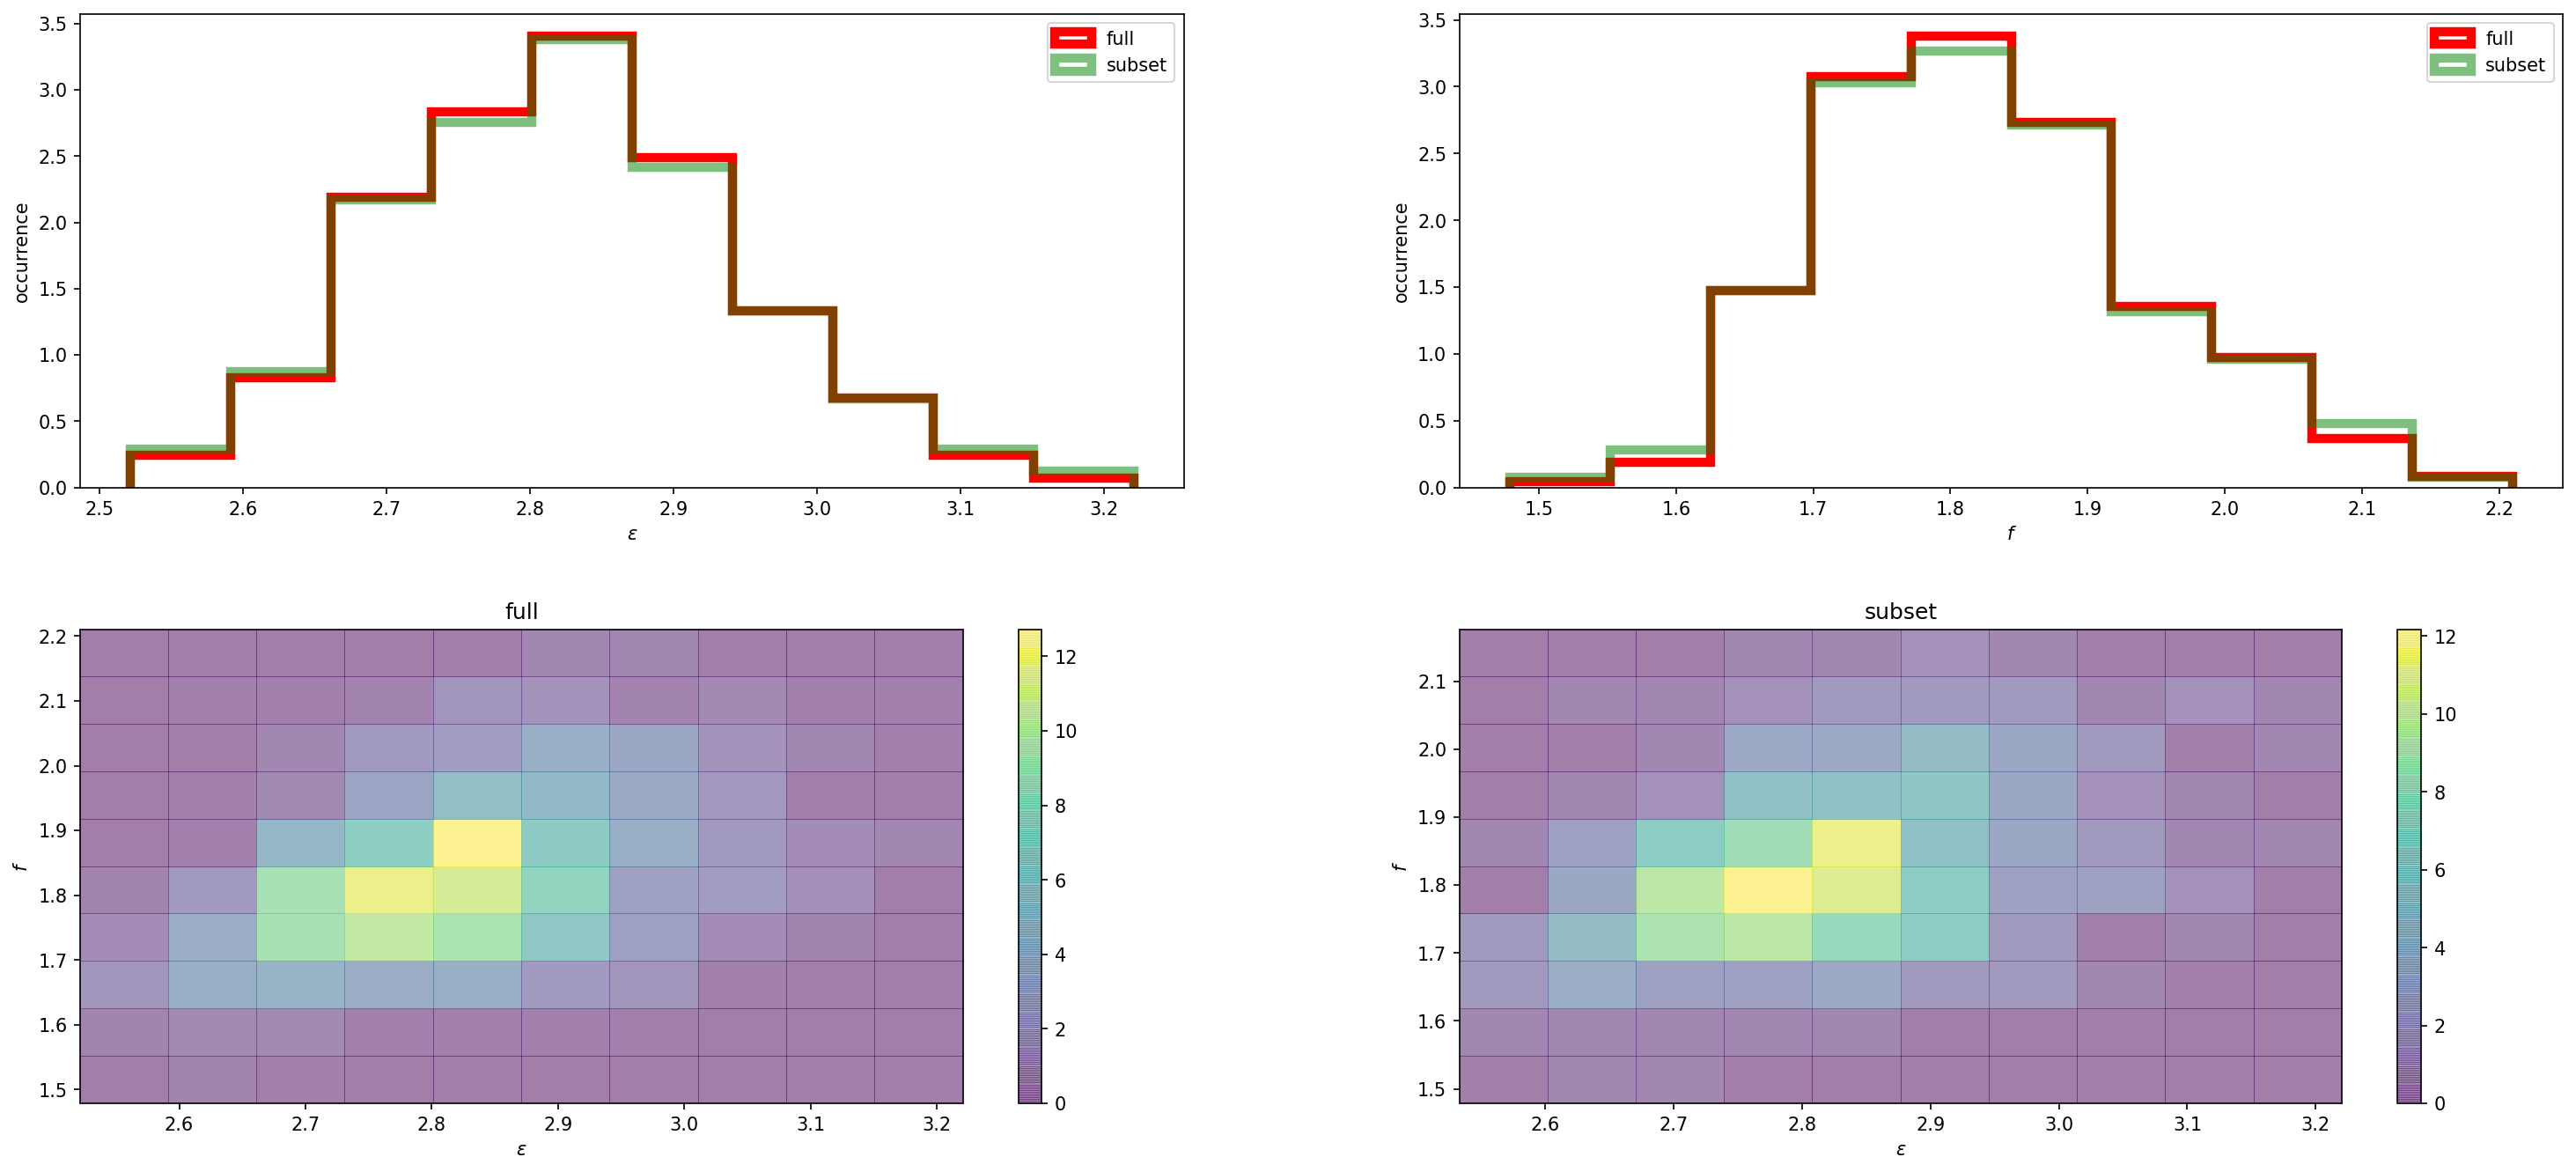

In [53]:
isos = pd.read_csv("cis-trans/trans_iso1.csv",index_col=0)[["ex_en", "osc"]].values
nbins = 10
plotbins = 10
factor = 3
t1 = 0.0001
thresh = 0.001
sbst = fncs.subset2D(isos, nbins, factor, t1, thresh)
fig = plt.figure(figsize=(20, 10), dpi=150)
ax = fig.add_subplot(221)
_, bins, _t = ax.hist(isos[:,0], bins=plotbins, alpha=1, density=True,color="red", histtype="step", linewidth=5,
                      label="full")
ax.hist(isos[:,0][sbst], bins=bins, alpha=0.5, density=True, color="green", histtype="step", linewidth=5,
        linestyle="-", label="subset")
ax.set_xlabel(r"$\varepsilon$")
ax.set_ylabel("occurrence")
ax.legend()
ax2 = fig.add_subplot(222)
_, bins, _t = ax2.hist(isos[:,1], bins=plotbins, alpha=1, density=True,
                       color="red", histtype="step", linewidth=5, label="full")
ax2.hist(isos[:,1][sbst], bins=bins, alpha=0.5, density=True,
         color="green", histtype="step", linewidth=5, linestyle="-", label="subset")
ax2.set_xlabel("$f$")
ax2.set_ylabel("occurrence")
ax2.legend()
ax3 = fig.add_subplot(223)
h3 = ax3.hist2d(*isos.T, bins=10, alpha=0.5, density=True)
ax3.set_xlabel(r"$\varepsilon$")
fig.colorbar(h3[3], ax=ax3)
ax3.set_ylabel(r"$f$")
ax3.set_title("full")
ax4 = fig.add_subplot(224)
h4 = ax4.hist2d(*isos[sbst].T, bins=10, alpha=0.5, density=True)
ax4.set_xlabel(r"$\varepsilon$")
fig.colorbar(h4[3], ax=ax4)
ax4.set_ylabel(r"$f$")
ax4.set_title("subset")
fig.subplots_adjust(left=0.05, right=0.99, top=0.9, bottom=0.075, wspace=0.25, hspace=0.3)

In [ ]:
isos = pd.read_csv("cis-trans/trans_iso1.csv",index_col=0)[["ex_en", "osc"]].values
nbins = 10
plotbins = 10
factor = 3
t1 = 0.00001
thresh = 0.001
for factor in range(1,15): 
    sbstS = fncs.subset2D(isos, nbins, factor, t1, thresh)
    sbstN = fncs.neighs_subset2D(isos, nbins, factor, t1, thresh)
    print("factor: {}".format(factor))
    print(r"$\Delta <\varepsilon^{{{lbl}}}>$ = {d1:.5f}   $\Delta <f^{{{lbl}}}>$ = {d2:.5f}".format(**{
                        "d1": np.average(isos[:,0], weights=isos[:,1]) - np.average(isos[:,0][sbstS],
                                                                                    weights=isos[:,1][sbstS]),
                        "d2": np.average(isos[:,1]) - np.average(isos[:,1][sbstS]),
                        "lbl": "simple"}))
    print(r"$\Delta <\varepsilon^{{{lbl}}}>$ = {d1:.5f}   $\Delta <f^{{{lbl}}}>$ = {d2:.5f}".format(**{
                        "d1": np.average(isos[:,0], weights=isos[:,1]) - np.average(isos[:,0][sbstN],
                                                                                    weights=isos[:,1][sbstN]),
                        "d2": np.average(isos[:,1]) - np.average(isos[:,1][sbstN]),
                        "lbl": "neighbours"}))
    print("\n")